In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("IndiaGDP.xlsx")

In [3]:
df

,Year,GDP,Per Capita
0,2007,9.80,1130
1,2008,3.89,1157
2,2009,8.48,1237
3,2010,10.26,1345
4,2011,6.64,1416
5,2012,5.62,1475
6,2013,6.64,1550
7,2014,7.24,1646
8,2015,7.56,1758
9,2016,7.62,1862


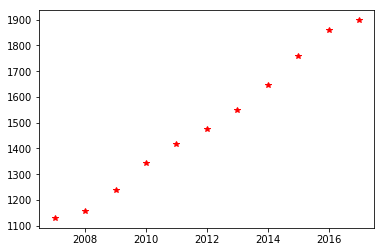

In [4]:
plt.plot(df['Year'],df['Per Capita'], 'r*')
plt.show()

In [29]:
# Let us start Linear Regression
regr = linear_model.LinearRegression()

In [30]:
regr.fit(df[['GDP','Year']], df['Per Capita'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
print(regr.intercept_, regr.coef_)

-163075.83001723836 [ 7.36579404 81.76887987]


In [32]:
mscore = regr.score(df[['GDP','Year']], df['Per Capita'])

In [33]:
print("Score: ", mscore)

Score:  0.9948287439152051


In [10]:
result = regr.predict(df[['GDP','Year']])

In [23]:
result

array([1106.49665471, 1144.73369179, 1260.31156631, 1355.19155957,
       1410.296265  , 1484.55203495, 1573.83402474, 1660.02238103,
       1744.14831499, 1826.35914249, 1908.05436442])

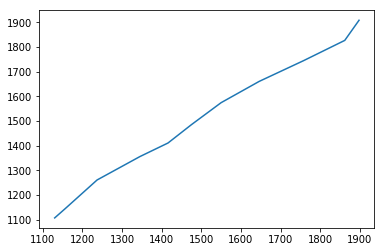

In [12]:
# Plot predicted v/s actual. This should be close to 45 degrees
plt.plot(df['Per Capita'],result)

In [13]:
# Try an alternate method of Regression Analysis ... Statistical Perspective
import statsmodels.api as sm

In [14]:
regr2 = sm.OLS(df['Per Capita'],df[['Year','GDP']])
model = regr2.fit()

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Per Capita   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     154.1
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           1.09e-07
Time:                        09:21:48   Log-Likelihood:                -76.604
No. Observations:                  11   AIC:                             157.2
Df Residuals:                       9   BIC:                             158.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.7663      0.189      4.056      0.0

C:\Users\soura\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [16]:
# Linear Regression reflects correlations between the predictor and response variables
# So, lets find out the correlation between response variable 'Per Capita' and the two independent variables - GDP and Year
mCorr = df.corr()
mCorr

# We find that Per Capita is very strongly correlated with Year (0.99) and very very weakly correlated with GDP
# Hence the plot of Per Capita v/s GDP is random
# Whereas the plot of Per Capita v/s Year is a straight line

,Year,GDP,Per Capita
Year,1.000000,-0.081546,0.996238
GDP,-0.081546,1.000000,-0.033047
Per Capita,0.996238,-0.033047,1.000000


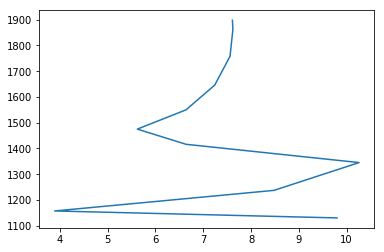

In [17]:
plt.plot(df['GDP'], df['Per Capita'])
plt.show()

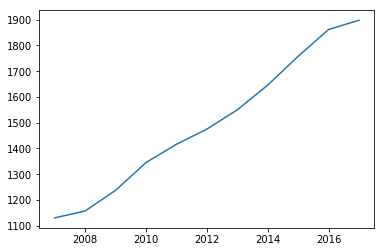

In [18]:
plt.plot(df['Year'], df['Per Capita'])
plt.show()

In [19]:
# We calculate the R-squared value. Closer the value is to 1, better the regression (although that cannot be the only
# criteria to assess the Regression quality)
regr.score(df[['GDP', 'Year']], df['Per Capita'])

0.9948287439152051

In [20]:
# Based on the above analysis, if we ignore GDP then lets see its impact on the score
regr2 = linear_model.LinearRegression()
regr2.fit(df[['Year']], df['Per Capita'])
list2 = np.array((df['Year'])).reshape(-1,1)
print(regr2.score(list2,df['Per Capita']))

0.9924907655356136


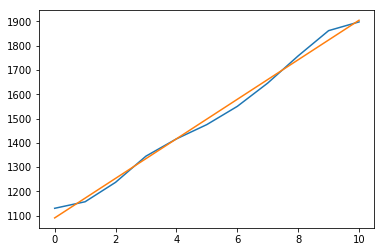

In [21]:
result2 = regr2.predict(df[['Year']])
plt.plot(df["Per Capita"])
plt.plot(result2)
plt.show()